In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_score, accuracy_score, roc_curve, mean_absolute_error, mean_squared_error, r2_score

df_train = pd.read_csv('./dataset/train.csv',delimiter=",",encoding="UTF-8")

df_test = pd.read_csv('./dataset/test.csv',delimiter=",",encoding="UTF-8")

sample = pd.read_csv("./dataset/sample_submission.csv",delimiter=",",encoding="UTF-8")


In [2]:
""" . Análise exploratória de dados: Faça uma análise exploratória dos dados para entender a 
distribuição das variáveis e identificar possíveis correlações entre elas. """


print("Contagem para cada tipo no csv:")
print(df_train.dtypes.value_counts())
print("---------------------------------------------------")
print("Tipos:")
df_train.dtypes

Contagem para cada tipo no csv:
object     43
int64      35
float64     3
dtype: int64
---------------------------------------------------
Tipos:


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


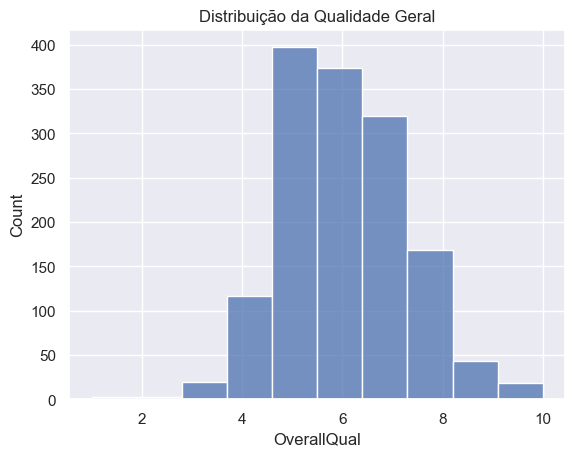

In [4]:
sns.set(style="darkgrid")
sns.histplot(data=df_train, x='OverallQual', bins=10)
plt.title('Distribuição da Qualidade Geral')
plt.show()


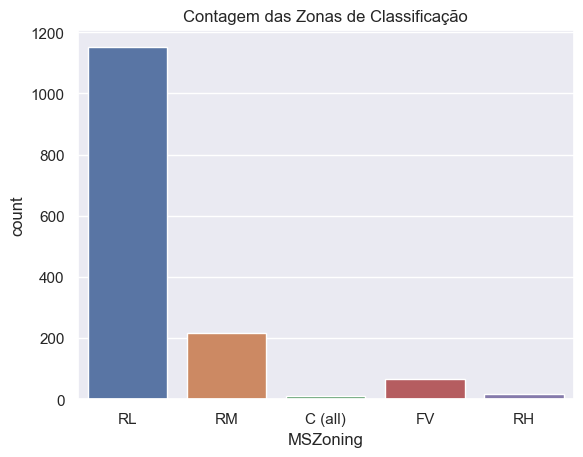

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [5]:
sns.countplot(data=df_train, x='MSZoning')
plt.title('Contagem das Zonas de Classificação')
plt.show()
plt.figure(figsize=(10, 6))
#A	Agriculture
#C	Commercial
#FV	Floating Village Residential
#I	Industrial
#RH	Residential High Density
#RL	Residential Low Density
#RP	Residential Low Density Park 
#RM	Residential Medium Density

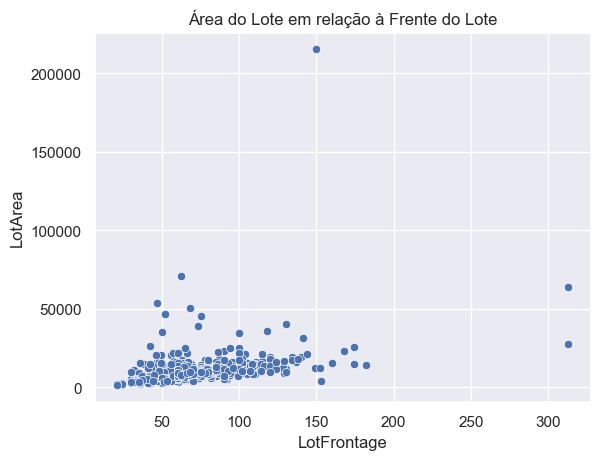

In [6]:
sns.scatterplot(data=df_train, x='LotFrontage', y='LotArea')
plt.title('Área do Lote em relação à Frente do Lote')
plt.show()

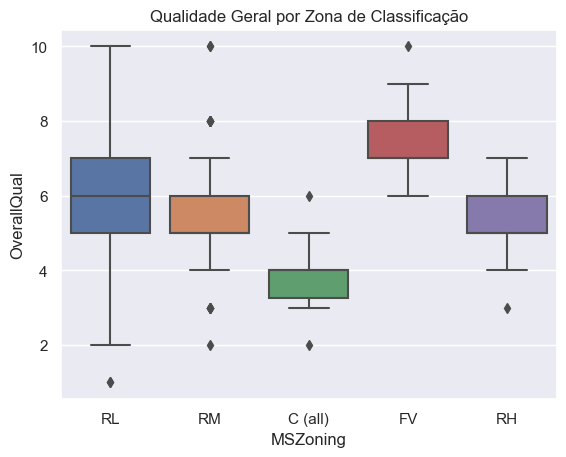

In [7]:
sns.boxplot(data=df_train, x='MSZoning', y='OverallQual')
plt.title('Qualidade Geral por Zona de Classificação')
plt.show()

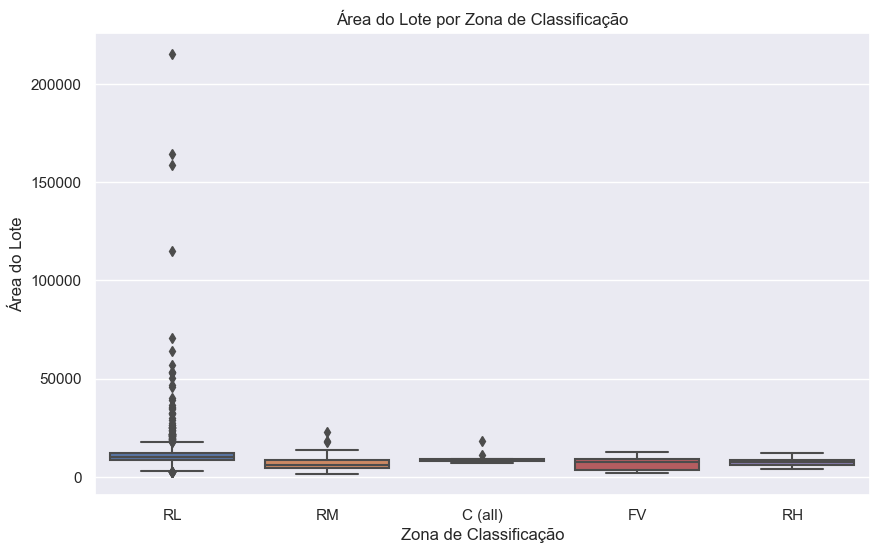

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='MSZoning', y='LotArea')
plt.title('Área do Lote por Zona de Classificação')
plt.xlabel('Zona de Classificação')
plt.ylabel('Área do Lote')
plt.show()

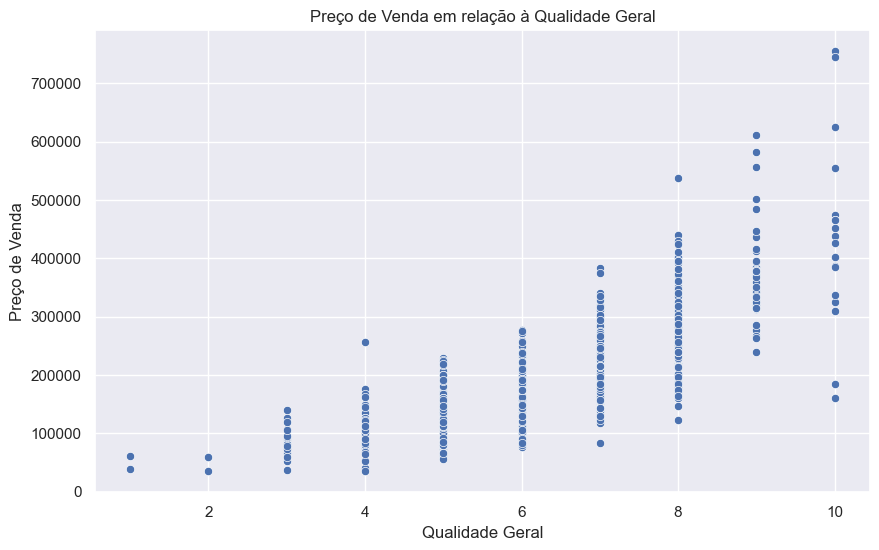

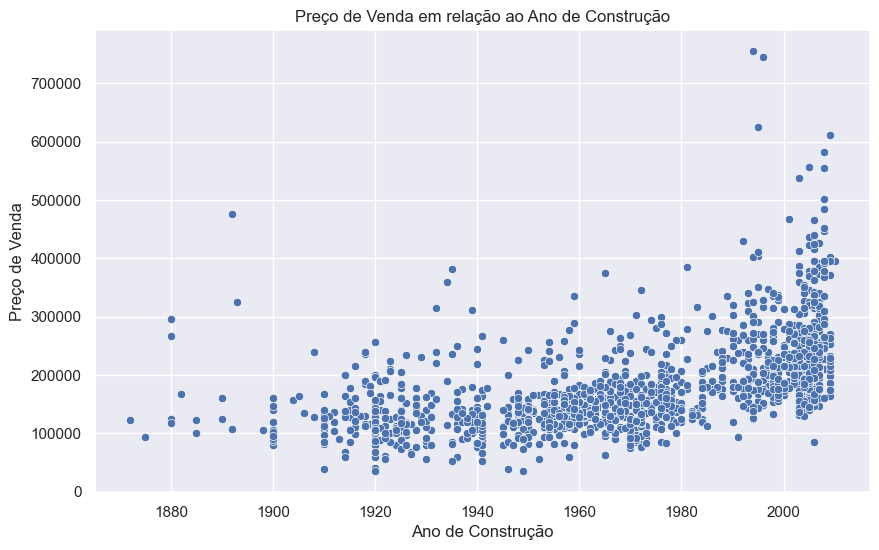

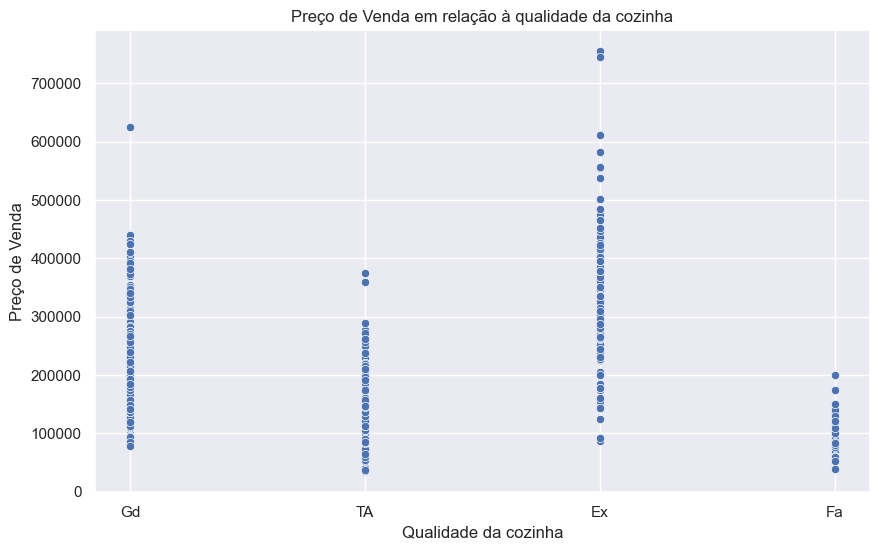

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='OverallQual', y='SalePrice')
plt.title('Preço de Venda em relação à Qualidade Geral')
plt.xlabel('Qualidade Geral')
plt.ylabel('Preço de Venda')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='YearBuilt', y='SalePrice')
plt.title('Preço de Venda em relação ao Ano de Construção')
plt.xlabel('Ano de Construção')
plt.ylabel('Preço de Venda')
plt.show()


""" Ex	Excellent
Gd	Good
TA	Typical/Average
Fa	Fair
Po	Poor """

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='KitchenQual', y='SalePrice')
plt.title('Preço de Venda em relação à qualidade da cozinha')
plt.xlabel('Qualidade da cozinha')
plt.ylabel('Preço de Venda')
plt.show()

In [10]:
"""Realize a engenharia de características para selecionar as variáveis mais 
importantes para o modelo de regressão. """  

#Tratando os NaN. Numéricos recebem a média de suas colunas e categoricos recebem um tipo
numeros = df_train.select_dtypes(include=np.number)
df_train[numeros.columns] = numeros.fillna(numeros.mean())
numeros = df_test.select_dtypes(include=np.number)
df_test[numeros.columns] = numeros.fillna(numeros.mean())

categoricos = df_train.select_dtypes(include='object')
df_train[categoricos.columns] = categoricos.fillna('Nulo')
categoricos = df_test.select_dtypes(include='object')
df_test[categoricos.columns] = categoricos.fillna('Nulo')

print(df_train.columns)
print(df_test)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

colunas_categoricas = categoricos.columns


label_encoder = LabelEncoder()
for col in colunas_categoricas:
    df_train_encoded[col] = label_encoder.fit_transform(df_train[col])

label_encoder = LabelEncoder()
for col in colunas_categoricas:
    df_test_encoded[col] = label_encoder.fit_transform(df_test[col])


In [28]:
""" Aprendizagem Supervisionada:
 a. Regressão Linear:  """

#Obtendo melhores atributos para fazer a relação

df_train_copia = df_train_encoded.copy()

y_train = df_train_copia['SalePrice']
x_train = df_train_copia.drop('SalePrice', axis=1)


selector = SelectKBest(score_func=f_regression, k=50)
selector.fit(x_train, y_train)

feature_indices = selector.get_support(indices=True)

caracteristicas = x_train.columns[feature_indices]

In [29]:
#Regressão linear

regressor = LinearRegression()

x_train = df_train_encoded[caracteristicas]

regressor.fit(x_train,y_train)

x_test = df_test_encoded[caracteristicas]

y_test_pred = regressor.predict(x_test)


y_train_pred = regressor.predict(x_train)


mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 19611.107282596306
MSE: 1040400134.6357514
RMSE: 32255.2342207548
R-squared: 0.8350348801840914
